In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
import sys
sys.path.append('../..')

In [6]:
import pandas as pd
from src import ComputationalHypergraphDiscovery as CHD
from src.ComputationalHypergraphDiscovery.Modes import LinearMode, QuadraticMode, GaussianMode
import matplotlib.pyplot as plt
import networkx as nx

In [7]:
# load data from file
Ntrain = 2000
df=pd.read_csv('SachsData.csv').sample(Ntrain,random_state=1)


Finding ancestors with kernel [linear]: 100%|██████████| 9/9 [00:08<00:00,  1.07it/s]



Results for $Raf$
Kernel [linear] has n/(n+s)=0.2746348004607516, Z=(1.00, 1.00), gamma=3.83e+01
Kernel [quadratic] has n/(n+s)=0.4614815504154739, Z=(0.99, 1.00), gamma=3.34e+01
$Raf$ has ancestors with the kernel [linear] | (n/(s+n)=0.26 after pruning)


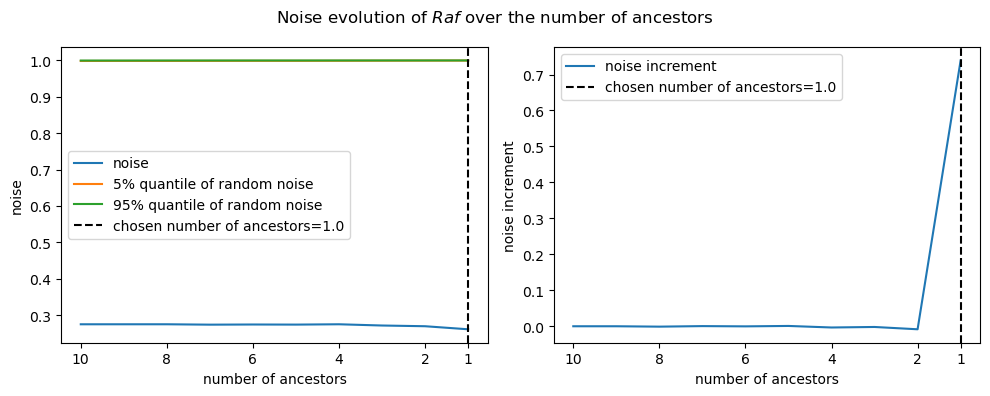

Ancestors of $Raf$: ['$Mek$']


Results for $Mek$
Kernel [linear] has n/(n+s)=0.2604239799122617, Z=(1.00, 1.00), gamma=3.66e+01
Kernel [quadratic] has n/(n+s)=0.4294328087559338, Z=(0.99, 1.00), gamma=2.98e+01
$Mek$ has ancestors with the kernel [linear] | (n/(s+n)=0.26 after pruning)


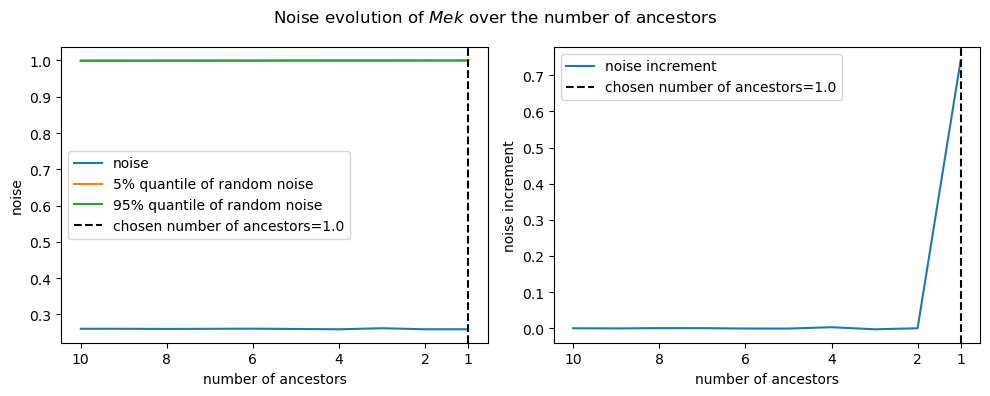

Ancestors of $Mek$: ['$Raf$']


Results for $PIP2$
Kernel [linear] has n/(n+s)=0.742768842485405, Z=(1.00, 1.00), gamma=3.78e+02
Kernel [quadratic] has n/(n+s)=0.8430235994934592, Z=(1.00, 1.00), gamma=2.78e+02
$PIP2$ has ancestors with the kernel [linear] | (n/(s+n)=0.75 after pruning)


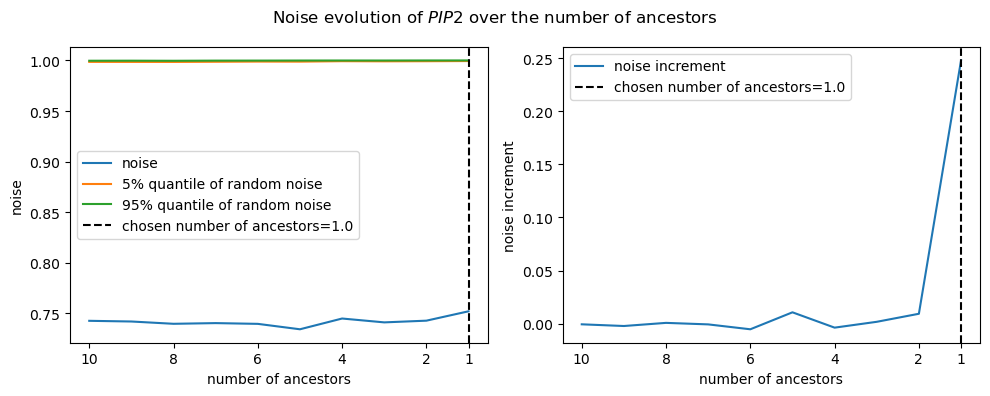

Ancestors of $PIP2$: ['$Plcg$']


Results for $PKA$
Kernel [linear] has n/(n+s)=0.9827348350201431, Z=(1.00, 1.00), gamma=1.75e+03
Kernel [quadratic] has n/(n+s)=0.9829350655554738, Z=(1.00, 1.00), gamma=1.34e+03
$PKA$ has ancestors with the kernel [linear] | (n/(s+n)=1.00 after pruning)


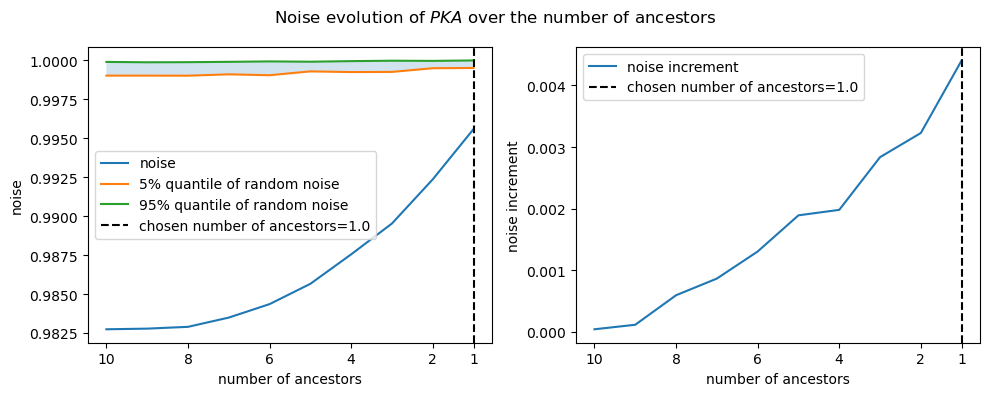

Ancestors of $PKA$: ['$Plcg$']


Results for $PKC$
Kernel [linear] has n/(n+s)=0.5176019865170381, Z=(1.00, 1.00), gamma=1.45e+02
Kernel [quadratic] has n/(n+s)=0.764841887714554, Z=(1.00, 1.00), gamma=5.70e+01
$PKC$ has ancestors with the kernel [linear] | (n/(s+n)=0.52 after pruning)


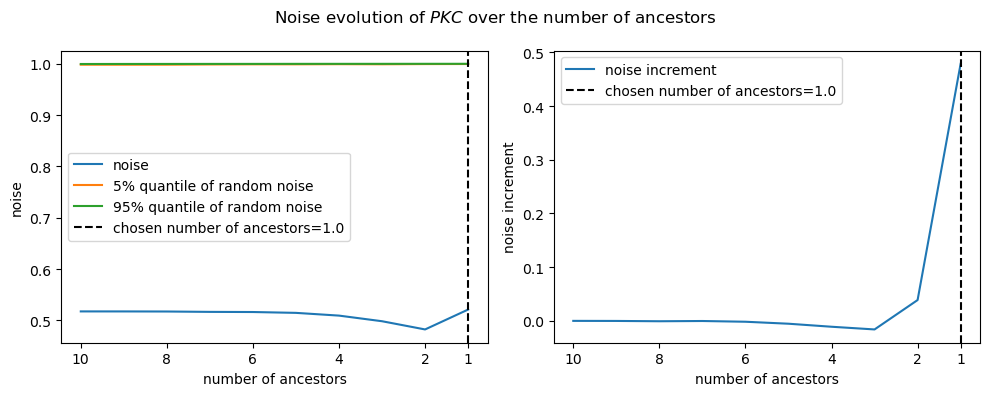

Ancestors of $PKC$: ['$P38$']


Results for $P38$
Kernel [linear] has n/(n+s)=0.5294464504120443, Z=(1.00, 1.00), gamma=1.51e+02
Kernel [quadratic] has n/(n+s)=0.8215865331274015, Z=(1.00, 1.00), gamma=1.34e+02
$P38$ has ancestors with the kernel [linear] | (n/(s+n)=0.53 after pruning)


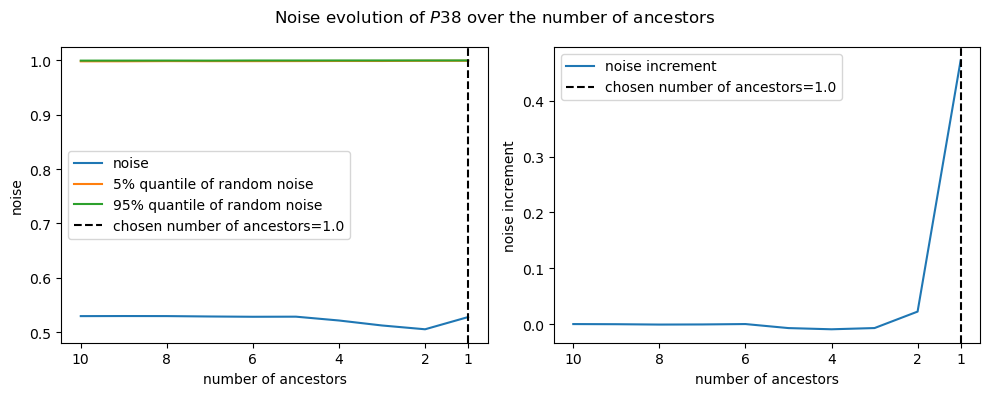

Ancestors of $P38$: ['$PKC$']


Results for $Jnk$
Kernel [linear] has n/(n+s)=0.7270770036320806, Z=(1.00, 1.00), gamma=5.29e+02
Kernel [quadratic] has n/(n+s)=0.8844781255960422, Z=(1.00, 1.00), gamma=3.57e+02
$Jnk$ has ancestors with the kernel [linear] | (n/(s+n)=0.83 after pruning)


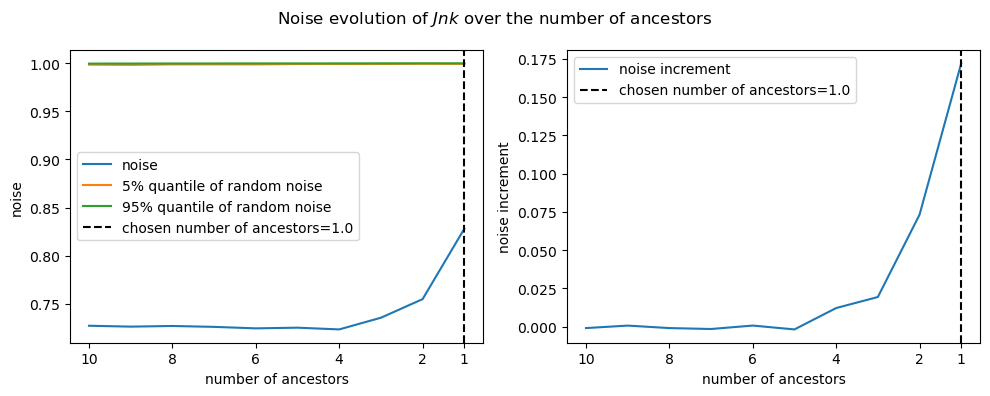

Ancestors of $Jnk$: ['$PKC$']



Finding ancestors with kernel [quadratic]: 100%|██████████| 9/9 [00:05<00:00,  1.54it/s]



Results for $Plcg$
Kernel [linear] has n/(n+s)=0.701103472784634, Z=(1.00, 1.00), gamma=3.41e+02
Kernel [quadratic] has n/(n+s)=0.6873420509401627, Z=(1.00, 1.00), gamma=8.57e+01
$Plcg$ has ancestors with the kernel [quadratic] | (n/(s+n)=0.84 after pruning)


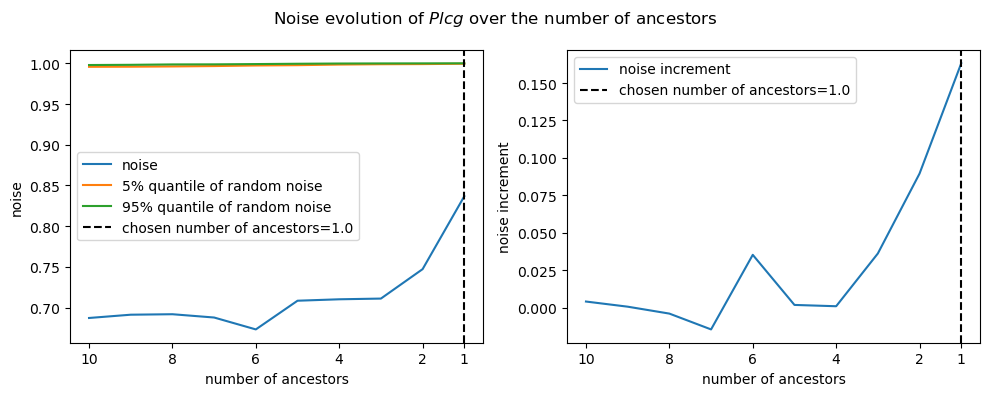

Ancestors of $Plcg$: ['$PIP2$']


Results for $PIP3$
Kernel [linear] has n/(n+s)=0.9970865923333705, Z=(1.00, 1.00), gamma=1.82e+03
Kernel [quadratic] has n/(n+s)=0.9941796587447972, Z=(1.00, 1.00), gamma=1.66e+03
$PIP3$ has ancestors with the kernel [quadratic] | (n/(s+n)=1.00 after pruning)


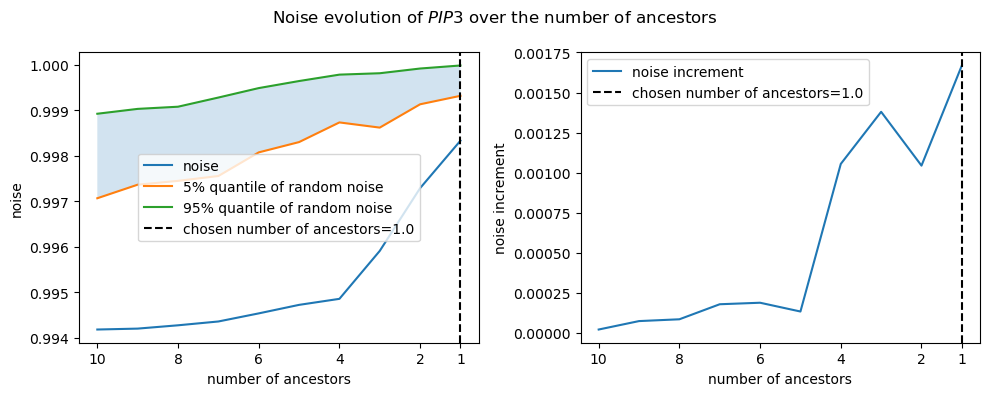

Ancestors of $PIP3$: ['$PIP2$']


Results for $Erk$
Kernel [linear] has n/(n+s)=0.9275186924955079, Z=(1.00, 1.00), gamma=9.49e+02
Kernel [quadratic] has n/(n+s)=0.8234122103039309, Z=(1.00, 1.00), gamma=3.31e+02
$Erk$ has ancestors with the kernel [quadratic] | (n/(s+n)=0.88 after pruning)


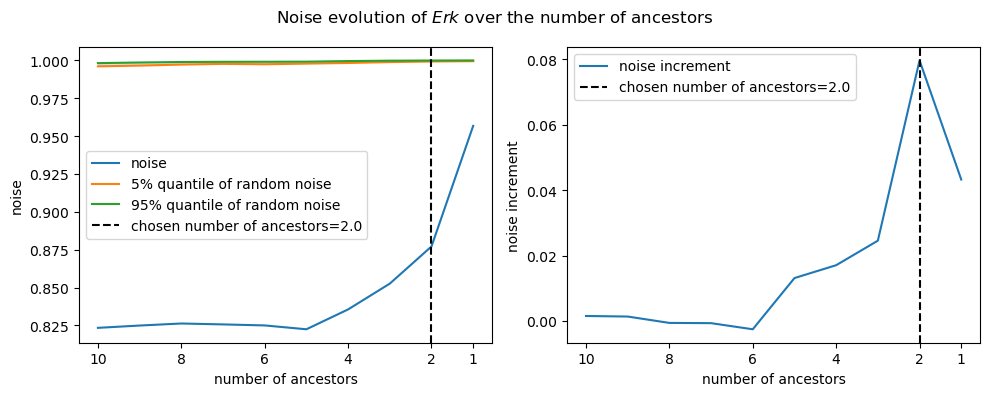

Ancestors of $Erk$: ['$Akt$', '$PKA$']


Results for $Akt$
Kernel [linear] has n/(n+s)=0.8044956525115546, Z=(1.00, 1.00), gamma=6.38e+02
Kernel [quadratic] has n/(n+s)=0.6828607841847381, Z=(1.00, 1.00), gamma=1.32e+02
$Akt$ has ancestors with the kernel [quadratic] | (n/(s+n)=0.85 after pruning)


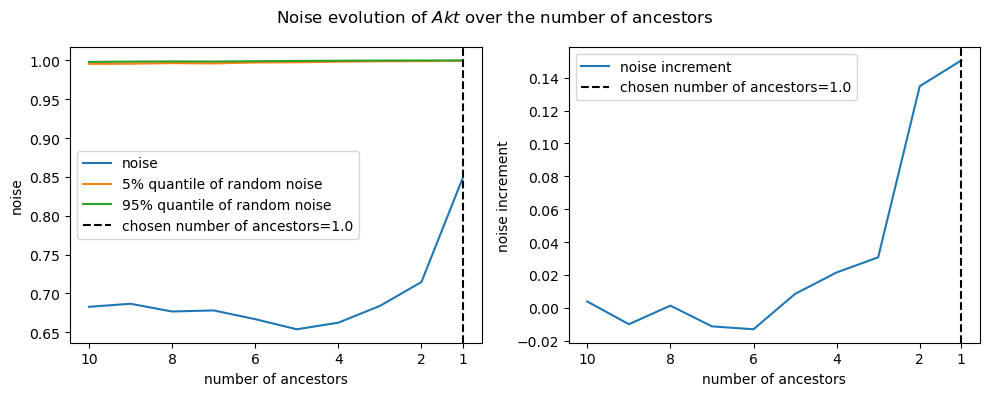

Ancestors of $Akt$: ['$Erk$']



In [8]:
graph_discovery = CHD.GraphDiscovery.from_dataframe(df,normalize=True,kernels=[0.1*LinearMode(),0.1*QuadraticMode()],gamma_min=1e-6)
graph_discovery.fit()

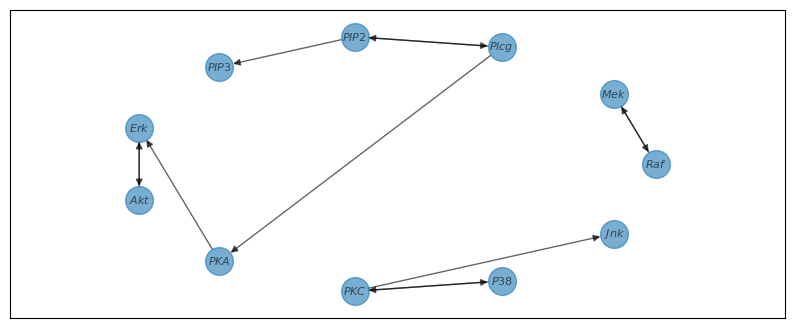

In [9]:
graph_discovery.plot_graph()

# Cluster analysis to be done
....

In [10]:
pass